In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
data = pd.read_csv("../data/ETTh1.csv", sep=",")
data["time_idx"] = [x for x in range(data.shape[0])]
data.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,time_idx
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,0
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,1
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,2
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,3
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,4


<AxesSubplot:xlabel='time_idx', ylabel='OT'>

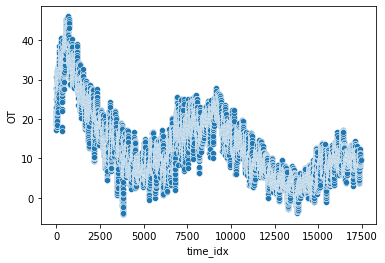

In [5]:
sns.scatterplot(data=data, x="time_idx", y="OT")

In [6]:
result = adfuller(data.OT)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.487964
p-value: 0.008302


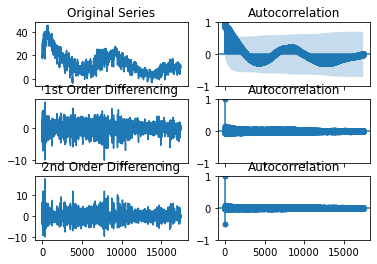

In [7]:
# make stationary

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.OT)
axes[0, 0].set_title('Original Series')
plot_acf(data.OT, ax=axes[0, 1], lags = np.arange(len(data)))

# 1st Differencing
axes[1, 0].plot(data.OT.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.OT.diff().dropna(), ax=axes[1, 1], lags = np.arange(len(data)-1))

# 2nd Differencing
axes[2, 0].plot(data.OT.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.OT.diff().diff().dropna(), ax=axes[2, 1], lags = np.arange(len(data)-2))

plt.show()

In [8]:
order = (12, 0, 12) # AR, I (stationary), MA
model = ARIMA(data.OT[:10452], order=order)

In [10]:
model_fit = model.fit()
print(model_fit.summary())

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                     OT   No. Observations:                10452
Model:               ARIMA(12, 0, 12)   Log Likelihood              -15265.955
Date:                Sat, 25 Dec 2021   AIC                          30583.910
Time:                        14:19:18   BIC                          30772.529
Sample:                             0   HQIC                         30647.616
                              - 10452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2973      1.938      8.926      0.000      13.499      21.095
ar.L1         -0.4599      0.442     -1.041      0.298      -1.325       0.406
ar.L2         -0.2502      0.429     -0.583      0.5

In [18]:
model_fit.params

const     17.297270
ar.L1     -0.459894
ar.L2     -0.250167
ar.L3     -0.082087
ar.L4     -0.097018
ar.L5      0.013495
ar.L6      0.335226
ar.L7      0.204037
ar.L8      0.366713
ar.L9      0.543412
ar.L10     0.512936
ar.L11     0.278309
ar.L12    -0.434375
ma.L1      1.440478
ma.L2      1.684137
ma.L3      1.762834
ma.L4      1.835423
ma.L5      1.811808
ma.L6      1.462606
ma.L7      1.257838
ma.L8      0.902021
ma.L9      0.361648
ma.L10    -0.126603
ma.L11    -0.393180
ma.L12     0.018809
sigma2     1.097282
dtype: float64

In [146]:
train = data.OT[:8760]
validation = data.OT[8760:11680]
test = data.OT[11680:14600]

In [87]:
order = (4, 1, 4)
model = ARIMA(train.diff().dropna(), order=order)  
fitted = model.fit()
fitted.summary()

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     OT   No. Observations:                13935
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -19388.144
Date:                Sat, 25 Dec 2021   AIC                          38794.289
Time:                        14:57:25   BIC                          38862.167
Sample:                             0   HQIC                         38816.891
                              - 13935                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8963      0.065    -13.766      0.000      -1.024      -0.769
ar.L2         -0.9478      0.009   -102.273      0.000      -0.966      -0.930
ar.L3         -0.9390      0.064    -14.639      0.000      -1.065      -0.813
ar.L4         -0.0142      0.006     -2.523      0.012      -0.025      -0.003
ma.L1         -0.1180      0.065     -1.819      0.069      -0.245       0.009
ma.L2          0.0541      0.068      0.791      0.429      -0.080       0.188
ma.L3         -0.0013      0.068     -0.020      0.984      -0.134       0.131
ma.L4         -0.9326      0.064    -14.568      0.000      -1.058      -0.807
sigma2         0.9460      0.006    164.706      0.000       0.935       0.957
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             27924.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
fc = fitted.forecast(test.shape[0], alpha=0.05)  # 95% conf

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [89]:
res = [train[test.index[0]-1]]
for i in test.index:
    res.append(res[i-train.shape[0]]+fc[i-1])
res = res[1:]
res = pd.Series(data=res, index=[i for i in test.index])

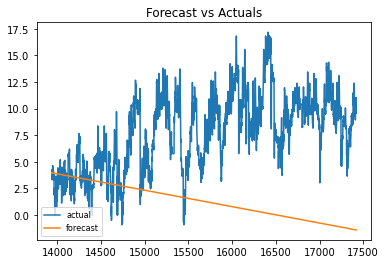

In [91]:
#plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(res, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='lower left', fontsize=8)
plt.show()

## ARIMA train/test

In [150]:
future = 24

In [151]:
# Standardize
numerical = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]
column_std = dict()
for num in numerical:
    x = data[num]
    avg = x.mean()
    std = x.std()
    column_std[num] = {"mean": avg, "std": std}
    data[num] = (data[num]-avg)/std

In [165]:
train = data.OT[:8760]
validation = data.OT[8760:11680]
tr_val = data.OT[:11680]
test = data.OT[11680:14600]

In [166]:
order = (2, 0, 2)
model = ARIMA(tr_val, order=order)  
fitted = model.fit()

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [167]:
fc = fitted.forecast(test.shape[0])

In [168]:
print(((fc-test)**2).mean()) #MSE
print((fc-test).abs().mean()) #MAE

2.064970974779687
1.3828471474971251


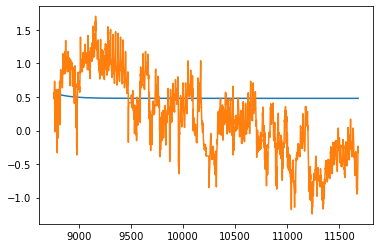

In [164]:
plt.plot(fc)
plt.plot(validation)